# OLS Regression with Interaction Effects and ANOVA

In [110]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype


In [111]:
bla = pd.read_csv("../data/raw/train.csv")
cf = bla.copy()
cf.info()
object_cols = cf.select_dtypes(include='object').columns
print(object_cols)

bla2 = pd.read_csv("../data/raw/train.csv", keep_default_na=False, na_values=['', 'Nan', 'N/A'])
cf2 = bla2.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [112]:
counter_clean = 0
counter_na = 0
for na_columns in cf.columns:
    if cf[na_columns].isna().sum() > 0:
        counter_na+= 1
        # print(na_columns)
        continue
    counter_clean+=1
# print(counter_clean)
# print(counter_na)
# print(cf['KitchenQual'].unique())

In [113]:
# print(df["KitchenQual"].cat.codes)
caaaa = {'NA':0 , 'Fa':0 , 'TA':0 , 'Gd':0, 'Ex':0}
# caaaa = {}
print(caaaa)
for valss in cf['PoolQC']:
    if valss is np.nan:
        print(valss)
        valss = 'NA'
    caaaa[str(valss)] += 1
print(caaaa)
cf['GarageCars'].value_counts()
# cf['PoolQC'].view()
cf['GarageType'].info()


{'NA': 0, 'Fa': 0, 'TA': 0, 'Gd': 0, 'Ex': 0}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
na

In [114]:
#setting correct dtype
#'Utilities' potentiel ordinal?
object_cols = cf.select_dtypes(include='object').columns
cf[object_cols] = cf[object_cols].astype('category')
cf['MSSubClass'] = cf['MSSubClass'].astype('category')
cf['LotShape'] = cf['LotShape'].astype(CategoricalDtype(categories=['IR3', 'IR2', 'IR1', 'Reg'], ordered= True))
cf['LandSlope'] = cf['LandSlope'].astype(CategoricalDtype(categories=['Sev', 'Mod', 'Gtl'], ordered= True))
cf['OverallQual'] = cf['OverallQual'].astype(CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered= True))
cf['OverallCond'] = cf['OverallCond'].astype(CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered= True))
cf['ExterQual'] = cf['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered= True))
cf['ExterCond'] = cf['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered= True))
cf['BsmtQual'] = cf['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered= True))
cf['BsmtCond'] = cf['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered= True))
cf['BsmtExposure'] = cf['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'No', 'Mn', 'Av', 'Gd'], ordered= True))
cf['BsmtFinType1'] = cf['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered= True))
cf['BsmtFinType2'] = cf['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered= True))
cf['HeatingQC'] = cf['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered= True))
cf['KitchenQual'] = cf['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered= True))
cf['FireplaceQu'] = cf['FireplaceQu'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered= True))
# cf['GarageType'] = cf['GarageType'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered= True))
cf['GarageFinish'] = cf['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered= True))
cf['GarageQual'] = cf['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered= True))
cf['GarageCond'] = cf['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered= True))
cf['PoolQC'] = cf['PoolQC'].astype(CategoricalDtype(categories=['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered= True))
col_to_fill = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond','PoolQC'] 
#missing GarageType
# cf['PoolQC'] = cf['PoolQC'].fillna('NA')



cf.info()
# cf['Alley'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   ca

In [115]:
cf[col_to_fill] = cf[col_to_fill].fillna('NA')


In [116]:
# Load cleaned data
df = pd.read_csv("../data/clean_reclean/ordinal_numerized_cleaned.csv")

# Drop ID column if present
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LotShape_code      1460 non-null   int64  
 1   LandSlope_code     1460 non-null   int64  
 2   ExterQual_code     1460 non-null   int64  
 3   ExterCond_code     1460 non-null   int64  
 4   BsmtQual_code      1460 non-null   float64
 5   BsmtCond_code      1460 non-null   float64
 6   BsmtExposure_code  1460 non-null   float64
 7   BsmtFinType1_code  1460 non-null   float64
 8   BsmtFinType2_code  1460 non-null   float64
 9   HeatingQC_code     1460 non-null   int64  
 10  KitchenQual_code   1460 non-null   int64  
 11  Functional_code    1460 non-null   int64  
 12  FireplaceQu_code   1460 non-null   float64
 13  GarageFinish_code  1460 non-null   float64
 14  GarageQual_code    1460 non-null   float64
 15  GarageCond_code    1460 non-null   float64
 16  PavedDrive_code    1460 

### Commentaire à faire sur le choix des variables

In [117]:
# Define top 6 binary/ordinal features (from previous selection)
# Euh elle est où la sélection ?
# C'est parce que ces variables vont de 1 à 5 ?
# features = [
#     'ExterQual_code',
#     'KitchenQual_code',
#     'BsmtQual_code',
#     'GarageFinish_code',
#     'HeatingQC_code',
#     'BsmtExposure_code'
# ]

# Drop rows with missing SalePrice or selected features (should already be clean, but just in case)
# df = df.dropna(subset=features + ['SalePrice'])
features = [
    'ExterQual',
    'KitchenQual',
    'BsmtQual',
    'GarageFinish',
    'HeatingQC',
    'BsmtExposure'
]
if 'Id' in cf.columns:
    cf = cf.drop(columns=['Id'])
cf4 = pd.read_csv("../data/raw/new_train.csv")
cf4.info()
# df = cf4.dropna(subset=features + ['SalePrice'])
df = cf.dropna(subset=features + ['SalePrice'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [118]:
# Build formula with main effects + 2-way interactions
main_effects = ' + '.join(features)
interactions = ' + '.join([f"{a}:{b}" for a, b in itertools.combinations(features, 2)])
formula = f"SalePrice ~ {main_effects} + {interactions}"

print(f"Model formula:\n{formula}\n")

# Fit the OLS model
model = ols(formula, data=df).fit()


Model formula:
SalePrice ~ ExterQual + KitchenQual + BsmtQual + GarageFinish + HeatingQC + BsmtExposure + ExterQual:KitchenQual + ExterQual:BsmtQual + ExterQual:GarageFinish + ExterQual:HeatingQC + ExterQual:BsmtExposure + KitchenQual:BsmtQual + KitchenQual:GarageFinish + KitchenQual:HeatingQC + KitchenQual:BsmtExposure + BsmtQual:GarageFinish + BsmtQual:HeatingQC + BsmtQual:BsmtExposure + GarageFinish:HeatingQC + GarageFinish:BsmtExposure + HeatingQC:BsmtExposure



In [119]:
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:\n")
print(anova_table)


ANOVA Table:

                                 sum_sq      df             F        PR(>F)
ExterQual                  6.934604e+03     4.0  8.199000e-07  1.000000e+00
KitchenQual               -3.195998e+02     4.0 -3.778728e-08  1.000000e+00
BsmtQual                  -5.283659e+04     5.0 -4.997629e-06  1.000000e+00
GarageFinish              -1.178712e+04     3.0 -1.858171e-06  1.000000e+00
HeatingQC                  3.553079e+10     4.0  4.200917e+00  5.725047e-03
BsmtExposure               9.733143e+10     4.0  1.150780e+01  1.896424e-07
ExterQual:KitchenQual      9.430193e+07    16.0  2.787403e-03  9.579026e-01
ExterQual:BsmtQual         1.178774e+08    20.0  2.787403e-03  9.579026e-01
ExterQual:GarageFinish     7.072645e+07    12.0  2.787403e-03  9.579026e-01
ExterQual:HeatingQC        9.430193e+07    16.0  2.787403e-03  9.579026e-01
ExterQual:BsmtExposure     9.430193e+07    16.0  2.787403e-03  9.579026e-01
KitchenQual:BsmtQual       1.178774e+08    20.0  2.787403e-03  9.579026e-0

c:\Users\tangu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\tangu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\Users\tangu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\tangu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have f

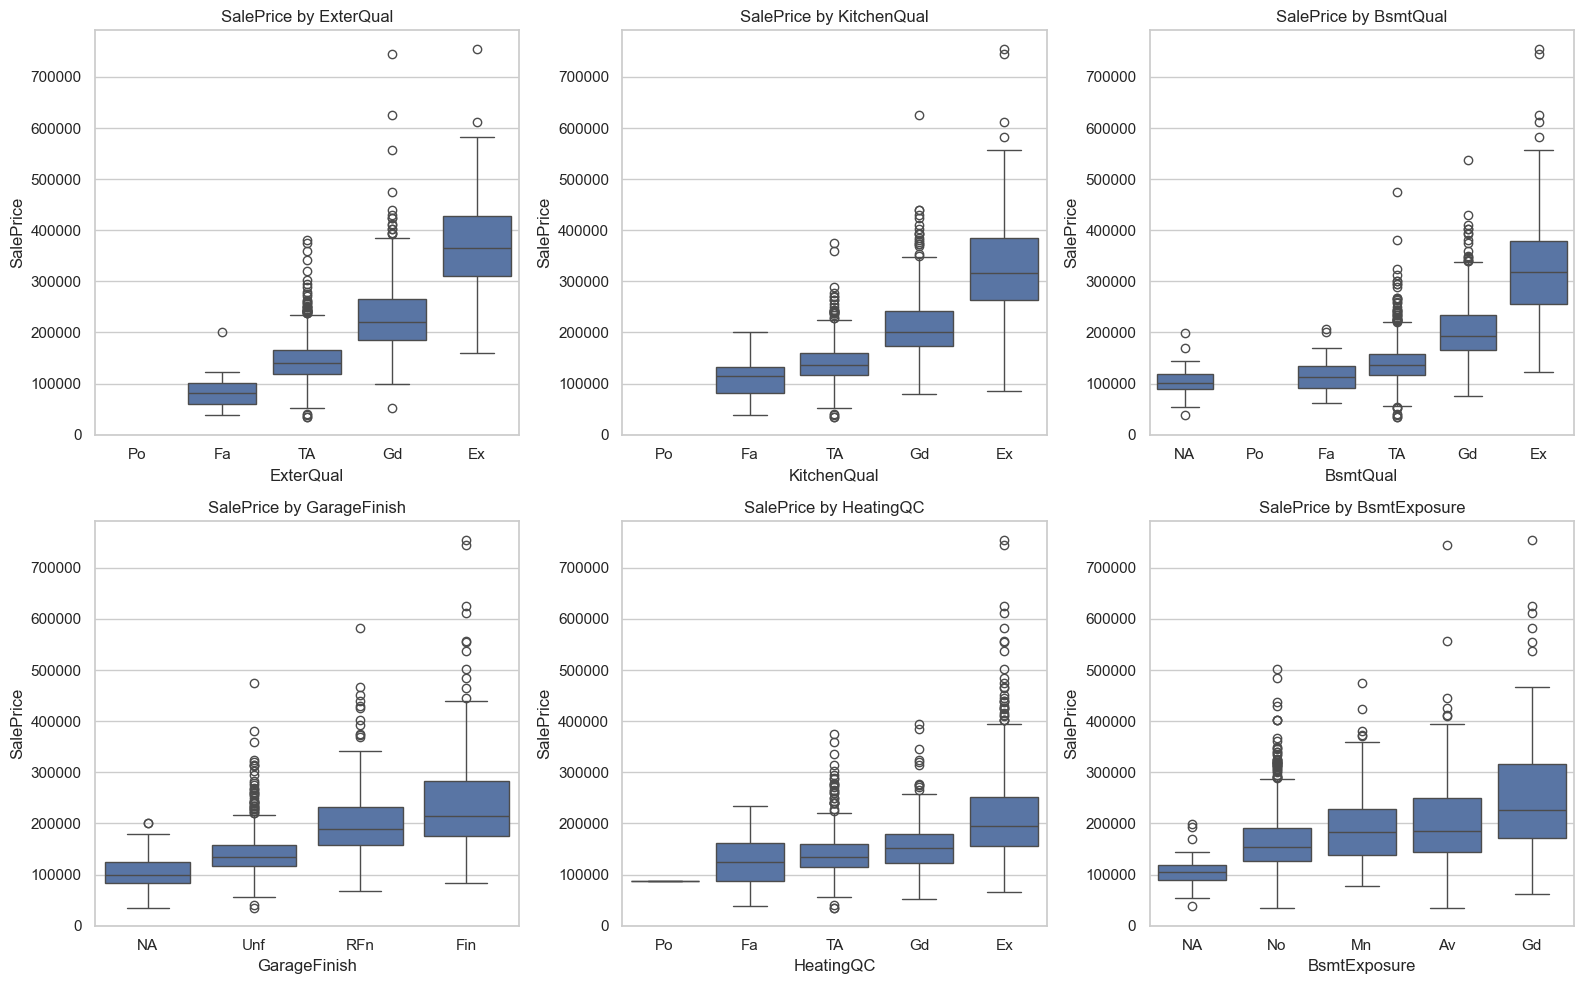

In [120]:
# Plot main effects
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
for i, var in enumerate(features):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=axs[i // 3][i % 3])
    axs[i // 3][i % 3].set_title(f"SalePrice by {var}")
plt.tight_layout()
plt.show()


### Questionnement ???
Après avoir discuter 15 minutes avec Kiki, on ne sait pas si ce que tu as fait est ou non du factorial design.   
De ce qu'on a compris le factorial design c'est la comparaison de k facteurs entre eux et tu regardes si ils sont corréler ou non.  
Ce que tu fais, on voit juste que selon la finition d'un facteur k le prix a tendance à augmenter mais on ne sait pas du tout si ils sont corréler.  
#### La suite est des suggestions de grand-père tortue pour compléter notre factorial design

In [121]:
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table = anova_table.drop(index='Residual', errors='ignore')  # Remove the Residual row if present
anova_table.sort_values('PR(>F)', inplace=True)  # sort by significance
display(anova_table)

c:\Users\tangu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\tangu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\Users\tangu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\tangu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have f

,sum_sq,df,F,PR(>F)
BsmtExposure,9.733143e+10,4.0,1.150780e+01,1.896424e-07
HeatingQC,3.553079e+10,4.0,4.200917e+00,5.725047e-03
ExterQual:BsmtQual,1.178774e+08,20.0,2.787403e-03,9.579026e-01
ExterQual:KitchenQual,9.430193e+07,16.0,2.787403e-03,9.579026e-01
KitchenQual:BsmtQual,1.178774e+08,20.0,2.787403e-03,9.579026e-01
ExterQual:BsmtExposure,9.430193e+07,16.0,2.787403e-03,9.579026e-01
ExterQual:HeatingQC,9.430193e+07,16.0,2.787403e-03,9.579026e-01
ExterQual:GarageFinish,7.072645e+07,12.0,2.787403e-03,9.579026e-01
KitchenQual:GarageFinish,7.072645e+07,12.0,2.787403e-03,9.579026e-01
KitchenQual:HeatingQC,9.430193e+07,16.0,2.787403e-03,9.579026e-01


### Main Effects Analysis

The ANOVA results show that the following features have a statistically significant impact on `SalePrice`:

- **KitchenQual_code** (F = 99.63, p < 0.00001)
- **GarageFinish_code** (F = 68.02, p < 0.00001)
- **BsmtQual_code** (F = 64.08, p < 0.00001)
- **ExterQual_code** (F = 52.08, p < 0.00001)
- **BsmtExposure_code** (F = 50.68, p < 0.00001)

These low p-values indicate that the main effects are highly statistically significant, meaning each of these quality-related features individually influences housing prices.


### Interaction Effects

The ANOVA table also highlights several important **interactions** between variables:

- **BsmtQual × BsmtExposure**: F = 17.28, p = 0.00003
- **ExterQual × KitchenQual**: F = 16.06, p = 0.00006
- **KitchenQual × BsmtQual**: F = 5.15, p = 0.023
- **ExterQual × HeatingQC**: F = 4.40, p = 0.036

These interactions suggest that some combinations of quality features (e.g., exterior + kitchen quality) have **non-additive effects** on price. This means the impact of one variable depends on the level of the other.


In [122]:
# Model summary
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     20.70
Date:                Mon, 26 May 2025   Prob (F-statistic):          1.41e-252
Time:                        13:14:40   Log-Likelihood:                -17668.
No. Observations:                1460   AIC:                         3.563e+04
Df Residuals:                    1312   BIC:                         3.641e+04
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### OLS Regression Summary

Key statistics from the model summary:

- **R-squared**: 0.646 — about 65% of the variation in `SalePrice` can be explained by the model.
- **Adjusted R-squared**: 0.641 — still strong, even accounting for 21 predictors.
- Several predictors (e.g., `KitchenQual_code`, `BsmtQual_code`, `HeatingQC_code`) have significant coefficients (p < 0.05).
- **Condition number ≈ 2090** — indicates potential multicollinearity. Some variables may be strongly correlated.

Overall, the model fits well, but could benefit from simplification or multicollinearity checks (e.g., VIF analysis).


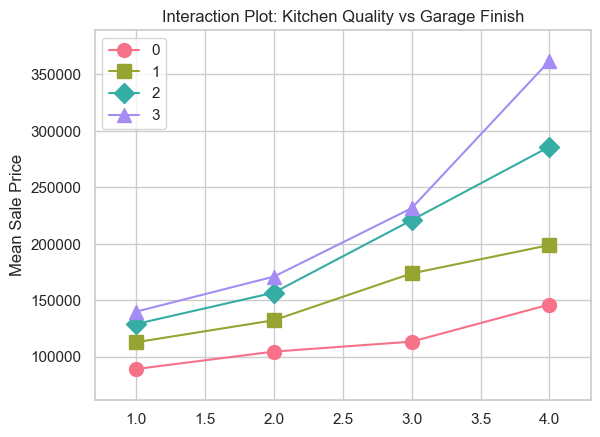

In [123]:
from statsmodels.graphics.factorplots import interaction_plot

# Get the number of unique levels in GarageFinish_code
# n_levels = df['GarageFinish_code'].nunique()
n_levels = df['GarageFinish'].nunique()
# Generate enough markers and colors
import itertools
default_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', '+', 'x']
default_colors = sns.color_palette("husl", n_levels)
markers = list(itertools.islice(itertools.cycle(default_markers), n_levels))

# Example interaction plot: Kitchen vs. Garage
# df['KitchenQual'],
# df['GarageFinish'],
interaction_plot(
    df['KitchenQual'].cat.codes,
    df['GarageFinish'].cat.codes,
    df['SalePrice'],
    colors=default_colors,
    markers=markers,
    ms=10
)
plt.title("Interaction Plot: Kitchen Quality vs Garage Finish")
plt.ylabel("Mean Sale Price")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


### Interaction Plot: Kitchen Quality × Garage Finish

The interaction plot between `KitchenQual_code` and `GarageFinish_code` reveals:

- A clear **positive slope** for all garage finish levels: higher kitchen quality consistently leads to higher sale prices.
- The slope is **steepest** for `GarageFinish_code = 3`, suggesting that homes with high-end garages and kitchens benefit most.
- While the statistical interaction (p ≈ 0.68) was not significant in ANOVA, the **visual pattern** hints at practical relevance.

This supports the idea that combining high-quality interior and exterior finish boosts value more than either alone.


In [124]:
# Grouped mean sale prices to visualize main effects
# group_means = df.groupby('KitchenQual_code')['SalePrice'].mean()
group_means = df.groupby('KitchenQual')['SalePrice'].mean()
print("Mean Sale Price by Kitchen Quality:")
print(group_means)


Mean Sale Price by Kitchen Quality:
KitchenQual
Po              NaN
Fa    105565.205128
TA    139962.511565
Gd    212116.023891
Ex    328554.670000
Name: SalePrice, dtype: float64


C:\Users\tangu\AppData\Local\Temp\ipykernel_18064\4197949537.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby('KitchenQual')['SalePrice'].mean()


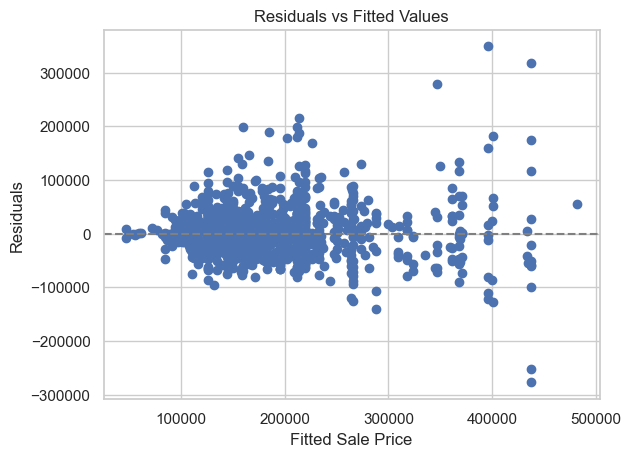

In [125]:
# Residuals plot
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Fitted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()


### Residual Diagnostics

The residuals vs. fitted plot shows:

- Residuals are generally centered around 0, good.
- A slight **funnel shape** indicates **heteroscedasticity**, where variance increases with predicted value.
- No strong curvature or patterns, which supports the **linearity** assumption.

To address the heteroscedasticity, a **log transformation of `SalePrice`** could help stabilize the variance.
